<a href="https://colab.research.google.com/github/AndrewRucker/ParlayCorrelation/blob/main/Initial%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Parlay betting model
#See read me for documentation https://github.com/AndrewRucker/ParlayCorrelation/blob/main/README.md
#Initial data exploration, just uploaded first csv of prop data from week 1 of 2021, lets see what we can do (09/15)


In [1]:
import pandas as pd
import seaborn as sns
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
sns.set_context(font_scale=2)

# to bypass warnings in various dataframe assignments
pd.options.mode.chained_assignment = None

In [2]:
#Read in CSV to dataframe
url = 'https://raw.githubusercontent.com/AndrewRucker/ParlayCorrelation/main/ParlayData.csv'

df = pd.read_csv(url, index_col='Game')

df

,OVER_UNDER,SPREAD,FAV_HOME,OVER,UNDER,FAV_COVER,UND_COVER,FAV_QB_YDS,FAV_QB_YDS_LINE,FAV_QB_COM,FAV_QB_COM_LINE,UND_QB_YDS,UND_QB_YDS_LINE,UND_QB_COM,UND_QB_COM_LINE,FAV_RB_ATT,FAV_RB_ATT_LINE,FAV_RB_YDS,FAV_RB_YDS_LINE,UND_RB_ATT,UND_RB_ATT_LINE,UND_RB_YDS,UND_RB_YDS,FAV_WR1_REC,FAV_WR1_REC_LINE,FAV_WR1_YDS,FAV_WR1_YDS_LINE,UND_WR1_REC,UND_WR1_REC_LINE,UND_WR1_YDS,UND_WR1_YDS_LINE,FAV_WR2_REC,FAV_WR2_REC_LINE,FAV_WR2_YDS,FAV_WR2_YDS_LINE,UND_WR2_REC,UND_WR2_REC_LINE,UND_WR2_YDS,UND_WR2_YDS_LINE
Game,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BUF16_PIT23_W1_2021,48.5,6.5,1,0,1,0,1,0,284.5,1,24.5,0,266.5,0,25.5,1,8.5,1,32.5,1,14.5,0,58.5,1,7.5,0,89.5,1,5.5,1,58.5,1,4.5,1,50.5,0,4.5,0,49.5
CAR19_NYJ14_W1_2021,44.5,4.5,1,0,1,1,0,1,250.5,1,22.5,1,232.5,0,20.5,1,18.5,1,73.5,0,7.5,0,27.5,1,4.5,1,59.5,1,4.5,1,54.5,0,4.5,1,51.5,1,3.5,0,37.5
ATL6_PHI32_W1_2021,47.5,3.5,1,0,1,0,1,0,295.5,0,24.5,1,245.5,1,20.5,1,12.5,1,45.5,0,15.5,1,64.5,0,5.5,0,89.5,1,3.5,1,43.5,0,4.5,0,46.5,1,3.5,1,42.5
KAN33_CLE29_W1_2021,52.5,6.5,1,1,0,0,1,1,312.5,1,26.5,1,262.5,0,22.5,1,11.5,0,48.5,1,13.5,1,71.5,1,6.5,1,88.5,0,5.5,1,57.5,0,7.5,0,82.5,1,5.5,1,57.5
GNB3_NOR38_W1_2021,50.5,4.5,0,0,1,0,1,0,272.5,0,24.5,0,252.5,0,21.5,0,14.5,0,60.5,0,14.5,0,61.5,0,7.5,0,88.5,0,5.5,0,46.5,0,3.5,0,37.5,0,3.5,0,45.5
NWE16_MIA17_W1_2021,44.5,2.5,1,0,1,0,1,0,232.5,0,19.5,0,234.5,0,21.5,1,14.5,1,68.5,0,10.5,1,43.5,1,3.5,0,49.5,0,3.5,1,46.5,1,2.5,1,27.5,0,3.5,0,36.5
DEN27_NYG13_W1_2021,42.5,2.5,0,0,1,1,0,1,247.5,1,22.5,1,221.5,1,18.5,1,12.5,1,47.5,0,14.5,0,61.5,1,3.5,1,48.5,1,4.5,1,49.5,1,4.5,1,50.5,1,3.5,1,41.5
MIN24_CIN27_W1_2021,47.5,3.5,0,1,0,0,1,1,256.5,1,21.5,0,261.5,0,23.5,1,21.5,0,97.5,1,15.5,1,65.5,1,4.5,1,58.5,1,4.5,1,59.5,0,5.5,0,75.5,1,3.5,1,47.5
SEA28_IND16_W1_2021,48.5,2.5,0,0,1,1,0,0,268.5,0,24.5,1,243.5,1,21.5,1,14.5,1,57.5,1,15.5,0,67.5,0,5.5,0,74.5,0,4.5,0,48.5,0,5.5,1,67.5,0,3.5,1,40.5


In [3]:
df.columns

Index(['OVER_UNDER', 'SPREAD', 'FAV_HOME', ' OVER', ' UNDER', ' FAV_COVER',
       ' UND_COVER', 'FAV_QB_YDS', 'FAV_QB_YDS_LINE', ' FAV_QB_COM',
       'FAV_QB_COM_LINE', ' UND_QB_YDS', 'UND_QB_YDS_LINE', ' UND_QB_COM',
       'UND_QB_COM_LINE', ' FAV_RB_ATT', 'FAV_RB_ATT_LINE', ' FAV_RB_YDS',
       'FAV_RB_YDS_LINE', ' UND_RB_ATT', 'UND_RB_ATT_LINE', ' UND_RB_YDS',
       'UND_RB_YDS', ' FAV_WR1_REC', 'FAV_WR1_REC_LINE', ' FAV_WR1_YDS',
       'FAV_WR1_YDS_LINE', ' UND_WR1_REC', 'UND_WR1_REC_LINE', ' UND_WR1_YDS',
       'UND_WR1_YDS_LINE', ' FAV_WR2_REC', 'FAV_WR2_REC_LINE', ' FAV_WR2_YDS',
       'FAV_WR2_YDS_LINE', ' UND_WR2_REC', 'UND_WR2_REC_LINE', ' UND_WR2_YDS',
       'UND_WR2_YDS_LINE'],
      dtype='object')

(24.5, -0.5)

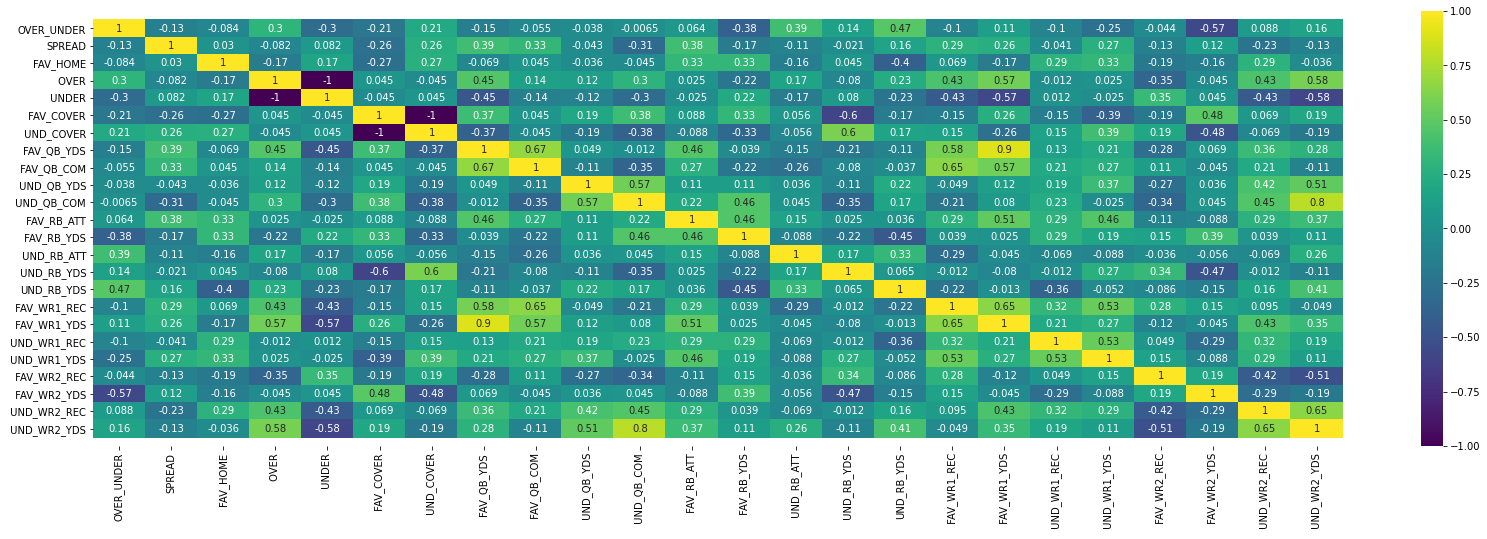

In [6]:
#Correlation matrix to see correlation factors between prop bets, spread, over/unders

corrmat = df[['OVER_UNDER', 'SPREAD', 'FAV_HOME', ' OVER', ' UNDER', ' FAV_COVER',
       ' UND_COVER', 'FAV_QB_YDS',' FAV_QB_COM', ' UND_QB_YDS', ' UND_QB_COM', ' FAV_RB_ATT',' FAV_RB_YDS', ' UND_RB_ATT',' UND_RB_YDS',
       'UND_RB_YDS', ' FAV_WR1_REC', ' FAV_WR1_YDS', ' UND_WR1_REC', ' UND_WR1_YDS', ' FAV_WR2_REC', ' FAV_WR2_YDS', ' UND_WR2_REC', ' UND_WR2_YDS']].corr()

f, ax = plt.subplots(figsize = (28,8))
matrix = sns.heatmap(corrmat,vmax=1, vmin =-1, annot=True, center = 0,
            cmap = 'viridis');
bottom, top = matrix.get_ylim()
matrix.set_ylim(bottom + 0.5, top - 0.5)
